# Stats

## Imports

In [46]:
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import scipy.stats as st
from openpyxl import load_workbook


rcParams["font.family"] = "Minion 3"


def conf_interval_mean(a, conf=0.95):  # 95% confidence interval
    mean, sem, m = np.mean(a), st.sem(a), st.t.ppf((1 + conf) / 2.0, len(a) - 1)
    return mean, m * sem

## Load data

In [47]:
metrics = ("comprehensibility", "naturalness", "accuracy", "intelligibility")
# creates a dataframe with columns like "comprehensibility-1", "comprehensibility-2", ..., "naturalness-1", ... for each {metric}×{sentence}
speakers = (1, 2, 3)
total_scores = pd.DataFrame(
    columns=[f"{metric}-{sentence+1}" for metric in metrics for sentence in range(5)]
)
# initialise the dataframe with empty arrays with three rows (one for each speaker)
total_scores.index.name = "speaker"
for speaker in speakers:
    # set the index to be the speaker number
    total_scores.loc[speaker] = [[] for _ in range(20)]

for f in glob("collected/*.xlsx"):
    # load the raw scores from Excel questionnaires
    wb = load_workbook(f)
    ws = wb.active
    raw_scores = np.array([[cell.value for cell in row] for row in ws["B21":"E35"]])

    # ensure that this is a valid questionnaire
    assert raw_scores.shape == (15, 4)
    raw_scores = raw_scores.astype(np.float32)  # force numeric type

    for speaker in speakers:
        sentence_scores = []
        for i in range(0, 15, 3):
            sentence_scores.append(raw_scores[i + speaker - 1])

        # append the scores to the dataframe
        for sentence in range(5):
            for i, metric in enumerate(metrics):
                total_scores[f"{metric}-{sentence+1}"][speaker].append(
                    sentence_scores[sentence][i]
                )

total_scores = total_scores.transpose()
total_scores

speaker,1,2,3
comprehensibility-1,"[4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
comprehensibility-2,"[4.0, 5.0, 4.0, 5.0, 3.0, 5.0, 4.0, 4.0, 5.0, ...","[4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
comprehensibility-3,"[4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, ...","[5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...","[5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
comprehensibility-4,"[4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[4.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
comprehensibility-5,"[5.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[5.0, 2.0, 4.0, 4.0, 3.0, 5.0, 5.0, 5.0, 4.0, ...","[5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, ..."
naturalness-1,"[3.0, 3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 5.0, 4.0, ...","[2.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 5.0, 4.0, ...","[5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
naturalness-2,"[2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 2.0, 4.0, 4.0, ...","[3.0, 5.0, 3.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, ...","[5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
naturalness-3,"[2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 5.0, 5.0, ...","[3.0, 3.0, 3.0, 4.0, 2.0, 5.0, 4.0, 4.0, 5.0, ...","[5.0, 5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
naturalness-4,"[3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 4.0, 5.0, ...","[2.0, 5.0, 3.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, ...","[5.0, 5.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."
naturalness-5,"[4.0, 3.0, 3.0, 4.0, 5.0, 5.0, 3.0, 5.0, 5.0, ...","[1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, ...","[5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ..."


## Analysis

### Overall mean

In [52]:
[
    conf_interval_mean(arr)
    for arr in (
        np.array([np.array(l) for l in total_scores[speaker]]).flatten()
        for speaker in speakers
    )
]

[(4.14, 0.12427799439810698),
 (4.185, 0.1446504887649708),
 (4.83, 0.0561071949160349)]

In [67]:
st.ttest_ind(
    np.array([np.array(l) for l in total_scores[1]]).flatten(),
    np.array([np.array(l) for l in total_scores[2]]).flatten(),
)

Ttest_indResult(statistic=-0.4653140756229973, pvalue=0.6419610525164777)

In [54]:
total_scores.groupby(by=lambda x: x.split("-")[0]).sum().applymap(conf_interval_mean)

speaker,1,2,3
accuracy,"(4.06, 0.25939268571750834)","(4.02, 0.35621334552509487)","(4.82, 0.11029336873243457)"
comprehensibility,"(4.48, 0.1745308559562786)","(4.58, 0.182381919566499)","(4.82, 0.11029336873243457)"
intelligibility,"(4.36, 0.22058673746486915)","(4.38, 0.23596687957036797)","(4.86, 0.09961378920666397)"
naturalness,"(3.66, 0.2848341512079343)","(3.76, 0.3225557034631974)","(4.82, 0.136959565115267)"


In [55]:
total_scores.groupby(by=lambda x: x.split("-")[1]).sum().applymap(conf_interval_mean)

speaker,1,2,3
1,"(4.35, 0.22381227708152632)","(4.45, 0.23965654230400077)","(4.825, 0.12306744572253456)"
2,"(3.7, 0.34123904619742124)","(4.7, 0.18033420649928583)","(4.825, 0.12306744572253456)"
3,"(3.85, 0.2762572667645471)","(4.15, 0.2565689360351658)","(4.875, 0.1293026146771884)"
4,"(4.275, 0.25075321811303264)","(4.55, 0.23965654230400077)","(4.75, 0.15784434737870706)"
5,"(4.525, 0.24006653834142366)","(3.075, 0.4121648150484216)","(4.875, 0.10711646868038867)"


In [69]:
st.ttest_ind(
    np.array([total_scores[1][f"{metric}-2"] for metric in metrics]).flatten(),
    np.array([total_scores[2][f"{metric}-2"] for metric in metrics]).flatten(),
    alternative="less",
)

Ttest_indResult(statistic=-5.240684567587662, pvalue=6.635398865392885e-07)

In [64]:
st.ttest_ind(
    np.array([total_scores[1][f"{metric}-5"] for metric in metrics]).flatten(),
    np.array([total_scores[2][f"{metric}-5"] for metric in metrics]).flatten(),
    alternative="greater",
)

Ttest_indResult(statistic=6.148873990007785, pvalue=1.5551237852452662e-08)

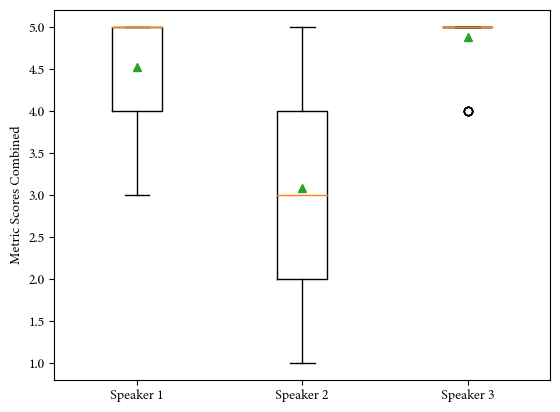

In [62]:
plt.boxplot(
    showmeans=True,
    x=np.array(
        [
            np.array(
                [
                    total_scores[speaker][f"{metric}-5"]
                    for metric in metrics
                ]
            ).flatten()
            for speaker in speakers
        ]
    ).transpose()
)
plt.xticks(np.arange(3) + 1, labels=["Speaker 1", "Speaker 2", "Speaker 3"])
plt.ylabel("Metric Scores Combined")
plt.show()